 # EARLY-STAGE PREDICTION OF DIABETES THROUGH ANN's

### PCA analysis:

<img src=Images/pca1.jpg width="450" height="450">
<img src=Images/pca2.jpg width="450" height="450">
<img src=Images/pca3.jpg width="450" height="450">


The three plots are the Principal Component Analysis plots for the individual omics datasets - Metabolomics, Proteomics and Lipidomics respectively. PCA plots are used for dimensionality reduction and hence relevant feature selection. In this scenario, we select those features that show the maximum variance from the mean axes of both the principal components. 


### Clustered Heatmap

<img src=Images/heatmap.jpg width="450" height="450">

The above plot is a clustered image map produced after integration of the three omics datasets. From the map, it becomes clear that the highly correlated features of each omics datasets are independent of those from the other datasets. This implies that the selected features from each dataset show little to no collinearity among each other. This indicates that the model that can be built henceforth will not be influenced by multicollinearity.

### Importing libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [152]:
import pandas as pd
import numpy as np

### Reading data from the dataset

In [58]:
df=pd.read_csv('lpm.csv')

df.head()

,SampleID,TAG58.8.FA22.6.Lipidomics,TAG58.9.FA18.1.Lipidomics,TAG58.9.FA18.2.Lipidomics,TAG58.9.FA22.6.Lipidomics,TAG60.12.FA22.6.Lipidomics,VTN.Proteomics,SERPING1.Proteomics,C2.Proteomics,APCS.Proteomics,IGHV3.23.Proteomics,C16H15NO5.Metabolomics,C19H34O15.Metabolomics,Tryptophan.betaine.2..Metabolomics,C12H22N6O2.Metabolomics,C22.4.FA..Adrenic.acid..Metabolomics,Class
0,ZOZOW1T-E11,1.7333,0.3811,0.3294,1.2646,0.2614,19458794.50,1.461850e+07,1711759.988,255568.0566,285553.98650,203417.8525,460302.0576,2060173.894,31369.16763,1.712774e+06,Diabetic
1,ZOZOW1T-E13,2.3332,0.5340,0.4847,1.8426,0.3826,16756529.00,1.312942e+07,1852381.727,159489.2876,174217.49720,145883.3609,407376.1750,1998828.928,70453.34467,4.534891e+05,Diabetic
2,ZOZOW1T-E14,2.0813,0.4820,0.4150,1.5556,0.3722,17211505.97,9.994272e+06,1653257.482,386988.1863,52239.37442,214421.1407,471304.8475,1948344.700,56703.69654,1.089655e+06,Diabetic
3,ZOZOW1T-E15,2.4707,0.5789,0.5181,1.9865,0.3995,19592660.78,1.466883e+07,1597317.859,217286.6480,333315.75820,186034.3336,479863.0002,2067495.077,50950.21936,1.919184e+06,Diabetic
4,ZOBX723-E11,2.5277,0.4301,0.4367,1.9111,0.1743,18536300.48,1.121176e+07,1635647.007,454254.0967,86056.10958,302531.9045,388315.7024,2848340.138,30327.68726,1.589609e+06,Prediabetic


### Preprocessing Data

In [62]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["class_code"] = ord_enc.fit_transform(df[["Class"]])
df[["Class", "class_code"]].head(20)

,Class,class_code
0,Diabetic,2.0
1,Diabetic,2.0
2,Diabetic,2.0
3,Diabetic,2.0
4,Prediabetic,3.0
5,Prediabetic,3.0
6,Prediabetic,3.0
7,Prediabetic,3.0
8,Prediabetic,3.0
9,Prediabetic,3.0


In [63]:
df = df.astype({'class_code':'int'})


df['class_code'].isnull().sum()

0

In [98]:
y=df.iloc[:,17:]
x=df.iloc[:,1:16]

In [100]:
cols_to_scale = ['TAG58.8.FA22.6.Lipidomics', 'TAG58.9.FA18.1.Lipidomics',
       'TAG58.9.FA18.2.Lipidomics', 'TAG58.9.FA22.6.Lipidomics',
       'TAG60.12.FA22.6.Lipidomics', 'VTN.Proteomics', 'SERPING1.Proteomics',
       'C2.Proteomics', 'APCS.Proteomics', 'IGHV3.23.Proteomics',
       'C16H15NO5.Metabolomics', 'C19H34O15.Metabolomics',
       'Tryptophan.betaine.2..Metabolomics', 'C12H22N6O2.Metabolomics',
       'C22.4.FA..Adrenic.acid..Metabolomics']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [64]:
df.class_code.unique()

array([2, 3, 1, 0])

In [309]:
x.shape
x.head()

,TAG58.8.FA22.6.Lipidomics,TAG58.9.FA18.1.Lipidomics,TAG58.9.FA18.2.Lipidomics,TAG58.9.FA22.6.Lipidomics,TAG60.12.FA22.6.Lipidomics,VTN.Proteomics,SERPING1.Proteomics,C2.Proteomics,APCS.Proteomics,IGHV3.23.Proteomics,C16H15NO5.Metabolomics,C19H34O15.Metabolomics,Tryptophan.betaine.2..Metabolomics,C12H22N6O2.Metabolomics,C22.4.FA..Adrenic.acid..Metabolomics
0,0.064727,0.086858,0.064414,0.060698,0.063803,0.279259,0.354406,0.491999,0.174957,0.075314,0.129512,0.256693,0.075268,0.012523,0.286398
1,0.097531,0.151928,0.135513,0.106049,0.098668,0.207355,0.297426,0.559155,0.104658,0.039375,0.088670,0.220422,0.072615,0.071703,0.012055
2,0.083756,0.129798,0.103603,0.083530,0.095676,0.219461,0.177458,0.464060,0.271115,0.000000,0.137323,0.264233,0.070432,0.050884,0.150648
3,0.105049,0.171036,0.150803,0.117339,0.103530,0.282821,0.356331,0.437345,0.146947,0.090732,0.117172,0.270098,0.075585,0.042172,0.331366
4,0.108166,0.107711,0.113538,0.111423,0.038748,0.254712,0.224046,0.455650,0.320333,0.010916,0.199870,0.207359,0.109352,0.010946,0.259566


In [308]:
class_labels=['Control','Crossover','Diabetic','Prediabetic']

### Neural Network Architechture

![ANN](Images/ModelArch2.jpg)

### Building a model

In [276]:
model=keras.Sequential([
      keras.layers.Dense(15,input_shape=(15,),activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(4,activation='softmax')
])



In [281]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 15)                240       
                                                                 
 dense_124 (Dense)           (None, 100)               1600      
                                                                 
 dense_125 (Dense)           (None, 100)               10100     
                                                                 
 dense_126 (Dense)           (None, 100)               10100     
                                                                 
 dense_127 (Dense)           (None, 4)                 404       
                                                                 
Total params: 22,444
Trainable params: 22,444
Non-trainable params: 0
_________________________________________________________________


### Loss and Optimizations

In [307]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,optimizer='Adam',metrics=['Accuracy'])

### Splitting the dataset into test and train

In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,shuffle=True)

### Training the model

In [279]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 0s 1ms/step - loss: 1.3419 - Accuracy: 0.6269
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.2287 - Accuracy: 0.7015
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0949 - Accuracy: 0.7015
Epoch 4/100
5/5 [==============================] - 0s 840us/step - loss: 0.9684 - Accuracy: 0.7015
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9175 - Accuracy: 0.7015
Epoch 6/100
5/5 [==============================] - 0s 836us/step - loss: 0.9175 - Accuracy: 0.7015
Epoch 7/100
5/5 [==============================] - 0s 905us/step - loss: 0.9047 - Accuracy: 0.7015
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8899 - Accuracy: 0.7015
Epoch 9/100
5/5 [==============================] - 0s 963us/step - loss: 0.8920 - Accuracy: 0.7015
Epoch 10/100
5/5 [==============================] - 0s 926us/step - loss: 0.8923 - Accuracy: 0.7015
Epoch 11/100
5/5 [=============

### Evaluating the results of the model using the test dataset

In [280]:

model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4217 - Accuracy: 0.8235


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.4217478632926941, 0.8235294222831726]

### Model Evaluation Statistics

In [287]:
y_pred=model.predict(X_test)
yp=[]
for i in y_pred:
    yp.append(np.argmax(i))


In [288]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.50      0.57         8
           3       0.85      0.92      0.88        25

    accuracy                           0.82        34
   macro avg       0.84      0.81      0.82        34
weighted avg       0.81      0.82      0.81        34



### Creating a confusion matrix

Text(69.0, 0.5, 'Truth')

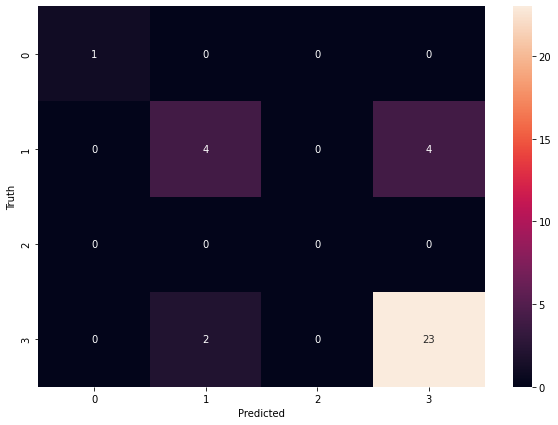

In [291]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=Y_test,predictions=yp)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [328]:
##User Defined function to return the class of diabetes predicted by the model.
def prediction(X):
    y_p=model.predict(X)
    return class_labels[np.argmax(y_p)]

In [327]:
##TESTING
sample=X_test.iloc[:1,:]
print("Class Of Diabetes Detected: "+prediction(sample))

Class Of Diabetes Detected: Control


###  Saving the Model

In [312]:
model.save("Med_seqdnn", overwrite=True, include_optimizer=False, save_format='tf')




2022-09-25 02:58:55.081815: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Med_seqdnn/assets


In [313]:
model.save('Model1.h5')